### 本脚本的目的: 错误分类展示
- 测试并展示错误分类

In [1]:
%run lib.ipynb

warnings.filterwarnings("ignore")

random.seed(9527)

- 测试集和训练集地址

In [2]:
test_dir = "/data/lulei/data/vehicle/frontal_103/split/test"
valid_dir = "/data/lulei/data/vehicle/frontal_103/split/valid"

- 获取所有图片，并按样本数量的多少对所有类别进行排序

In [3]:
image_paths = [i for i in Path(test_dir).rglob("*.jpg") ] + [i for i in Path(valid_dir).rglob("*.jpg")]
print(f"[INFO] total image num : {len(image_paths):,}")

random.shuffle(image_paths)

[INFO] total image num : 32,711


- 选择并加载神经网络模型

In [49]:
weight_files = [i for i in pathlib.Path("./output_models").rglob("*.pth")]
print(f"[INFO] weight files : ")

for index, weight_file in enumerate(weight_files):
    print(f"  [{index}] {weight_file.name}")
weight_file = weight_files[int(input("  your choice : "))]

network = os.path.basename(weight_file).split("_")[1]

# networks = ["alexnet", "densenet121", "resnet18", "resnet34", "resnet50", "vgg16", "vgg19"]

model_struc = eval(f"MODELS(class_num = 1759, with_wts = False).{network}()")
model = load_model_from_wts(model_struc, weight_file, gpu_id = [0,1])

[INFO] weight files : 
  [0] vehicle_resnet50_0.9182_49_best_20191224_142352.pth
  [1] vehicle_resnet18_0.9017_26_best_20191224_124247.pth
  [2] vehicle_densenet121_0.9182_40_best_20191224_113211.pth
  [3] vehicle_alexnet_0.8711_33_best_20191223_234904.pth
  [4] vehicle_vgg16_0.9128_30_best_20191224_173140.pth
  [5] vehicle_vgg19_0.9190_24_best_20191224_204329.pth


  your choice :  3


3


In [50]:
N = 5
M = 10501
image_path = image_paths[M]

In [51]:
y_true, top_n_results, image_name = predict(model, image_path, top = N)

In [52]:
base_color = "cornflowerblue"
right_color = "tomato"



长安__逸动__2013款XT1.6L手动俊酷型国IV__b4ce1b12965fd9b1b3f5a4a213586505b2072530.jpg



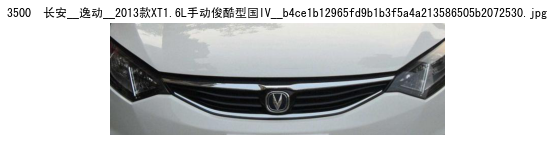

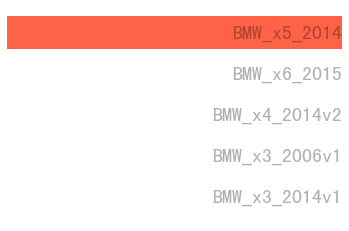

In [98]:
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['SimSun']
# mpl.rcParams['font.serif'] = ['SimSun']


# 27 63 78 91 107  101   117 168  169   183   
# for i in range(27):
i = 3500


image_path = image_paths[i]
y_true, top_n_results, image_name = predict(model, image_path, top = N)

x_axis_prob = [prob for prob, label in top_n_results]
y_axis = [i for i in range(N)]
color = [base_color if label != y_true else right_color for prob, label in top_n_results]




figure, ax=plt.subplots(1,1)

ax.axis("off")
ax.set_title(f"{i}  {image_name}")
print(image_name)
ax.imshow(Image.open(image_path))


figure, ax=plt.subplots(1,1)
plt.barh(y_axis, x_axis_prob[::-1], color = color[::-1])
plt.xlim(0 , 1)
plt.yticks([])
plt.axis("off")

# class_name_ = ["BMW_3_2013v2", "BMW_3_2010v1", "BMW_3_2013v1", "BMW_M3_2013v1","BMW_3_2005",] # 63

# class_name_ = ["VW_magotan_2011v1", "VW_passat_2011v1", "VW_phaeton_2011", "VW_touareg_2016", "VW_santana_2013"] #101

class_name_ = ["BMW_x5_2014", "BMW_x6_2015", "BMW_x4_2014v2", "BMW_x3_2006v1","BMW_x3_2014v1",] # 117

# class_name_ = ["BENZ_glk_2008v2", "BENZ_glk_2008_v1", "BENZ_glk_2013", "BENZ_r_2009","BENZ_glk_2009",] # 18

# class_name_ = ["TOYOTA_corolla_2010v1", "ZHONGHUA_FRV_2010", "SUBARU_forester_2013v1", "KIA_sorento_2009","SUBARU_xv_2012",] # 800
# class_name_ = ["BENZ_E_2005", "BENZ_S_2006", "BRABUS_S_2011", "BENZ_E_2009v3","BENZ_S_2014v4",] # 900

# class_name_ = ["GREATWALL_c30_2013", "GREATWALL_c30_2016", "SOUTHEAST_v5_2012", "BYD_L3_2010","FAW_S80_2011",] # 1000

# class_name_ = ["BAIC_BJ40L_2016", "BAIC_BJ40_2016", "JEEP_renegade_2016", "BAIC_BJ40_2014v3","JEEP_compass_2011",] # 1100


for index, (prob, label) in enumerate(top_n_results):
    class_name = label_to_classname[str(label)]
    make, mode, year = class_name.split("__")
    year = year.split("_")[0]
    class_name = f"{make}__{mode}__{year}"
    plt.text(1, N - index -1, class_name_[index], ha='right', va= 'center', \
             fontsize=20, alpha = 0.3, ) #backgroundcolor = "whitesmoke"

print()
# class_name_[index]